In [1]:
#https://www.kaggle.com/code/analystoleksandra/marketing-analytics-customer-segmentation
#dataset- https://www.kaggle.com/datasets/weihutchinson/customer-segementation-and-personas

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('/content/Jewellery Customer Segmentation Analysis Personas.csv')

In [12]:
df.head(10)

,CustomerID,Age,Gender,Location,ProductType,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,FollowDuration,...,IsActive,MarketingSpend,ProductCost,SalesRevenue,CustomerAcquisitionDate,CustomerExitDate,CustomerRetentionPeriod,CPA,NumberOfTransactions,CompletionRate
0,1,56,Male,North America,Bracelet,9,737,81.888889,2.079020,24,...,True,85.052053,368.5,737,22/07/2020,NaN,24.300000,85.052053,9,0.6
1,2,46,Female,Middle East,Ring,3,334,111.333333,7.614333,18,...,True,87.253327,167.0,334,23/06/2021,NaN,24.200000,87.253327,3,0.6
2,3,32,Male,Asia,Ring,1,515,515.000000,5.783094,10,...,True,56.871368,257.5,515,29/08/2021,NaN,16.466667,56.871368,1,0.6
3,4,60,Other,North America,Bracelet,7,1037,148.142857,3.591508,7,...,True,86.957420,518.5,1037,27/05/2022,NaN,1.966667,86.957420,7,0.6
4,5,25,Male,Europe,Ring,5,598,119.600000,5.435376,8,...,False,96.423852,299.0,598,24/04/2022,27/05/2023,1.900000,96.423852,5,0.6
5,6,38,Male,Middle East,Earrings,5,1073,214.600000,3.699479,6,...,False,122.273775,536.5,1073,24/07/2021,23/10/2022,32.000000,122.273775,5,0.6
6,7,56,Male,North America,Earrings,1,733,733.000000,6.364738,22,...,True,115.672949,366.5,733,11/01/2022,NaN,3.633333,115.672949,1,0.6
7,8,36,Male,Asia,Bracelet,9,1773,197.000000,4.904595,1,...,True,120.876565,886.5,1773,30/12/2020,NaN,36.000000,120.876565,9,0.6
8,9,40,Other,North America,Necklace,7,1119,159.857143,2.479650,4,...,False,50.836368,559.5,1119,16/03/2022,28/10/2023,4.866667,50.836368,7,0.6
9,10,28,Other,Asia,Earrings,8,214,26.750000,2.049248,14,...,True,71.766740,107.0,214,05/06/2020,NaN,38.000000,71.766740,8,0.6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Location                    1000 non-null   object 
 4   ProductType                 1000 non-null   object 
 5   PurchaseCount               1000 non-null   int64  
 6   TotalSpend                  1000 non-null   int64  
 7   AveragePurchaseValue        1000 non-null   float64
 8   EngagementScore             1000 non-null   float64
 9   FollowDuration              1000 non-null   int64  
 10  PreferredChannel            1000 non-null   object 
 11  CustomerCost                1000 non-null   float64
 12  CustomerProfitabilityScore  1000 non-null   float64
 13  ROAS                        1000 n

In [14]:
df.shape

(1000, 40)

In [15]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Location', 'ProductType',
       'PurchaseCount', 'TotalSpend', 'AveragePurchaseValue',
       'EngagementScore', 'FollowDuration', 'PreferredChannel', 'CustomerCost',
       'CustomerProfitabilityScore', 'ROAS', 'ROI', 'RFMScore', 'AverageRFM',
       'Persona', 'OperatingExpenses', 'AdditionalCosts', 'GrossProfit',
       'GrossProfitMargin', 'OperatingProfit', 'OperatingProfitMargin',
       'NetProfit', 'NetProfitMargin', 'CLTV', 'LastPurchaseDate',
       'SubscriptionStartDate', 'SubscriptionEndDate', 'IsActive',
       'MarketingSpend', 'ProductCost', 'SalesRevenue',
       'CustomerAcquisitionDate', 'CustomerExitDate',
       'CustomerRetentionPeriod', 'CPA', 'NumberOfTransactions',
       'CompletionRate'],
      dtype='object')

In [16]:
df.isna().sum()

CustomerID                      0
Age                             0
Gender                          0
Location                        0
ProductType                     0
PurchaseCount                   0
TotalSpend                      0
AveragePurchaseValue            0
EngagementScore                 0
FollowDuration                  0
PreferredChannel                0
CustomerCost                    0
CustomerProfitabilityScore      0
ROAS                            0
ROI                             0
RFMScore                        0
AverageRFM                      0
Persona                         0
OperatingExpenses               0
AdditionalCosts                 0
GrossProfit                     0
GrossProfitMargin               0
OperatingProfit                 0
OperatingProfitMargin           0
NetProfit                       0
NetProfitMargin                 0
CLTV                            0
LastPurchaseDate                0
SubscriptionStartDate           0
SubscriptionEn

In [18]:
df.nunique()

CustomerID                    1000
Age                             47
Gender                           3
Location                         4
ProductType                      4
PurchaseCount                    9
TotalSpend                     772
AveragePurchaseValue           933
EngagementScore               1000
FollowDuration                  24
PreferredChannel                 3
CustomerCost                   772
CustomerProfitabilityScore     772
ROAS                           772
ROI                            772
RFMScore                       125
AverageRFM                      13
Persona                          3
OperatingExpenses              772
AdditionalCosts                772
GrossProfit                    772
GrossProfitMargin                1
OperatingProfit                772
OperatingProfitMargin            1
NetProfit                      772
NetProfitMargin                  1
CLTV                           772
LastPurchaseDate               535
SubscriptionStartDat

In [20]:
df.drop(columns=['CompletionRate','NetProfitMargin','GrossProfitMargin','OperatingProfitMargin'],inplace=True)

In [21]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Location', 'ProductType',
       'PurchaseCount', 'TotalSpend', 'AveragePurchaseValue',
       'EngagementScore', 'FollowDuration', 'PreferredChannel', 'CustomerCost',
       'CustomerProfitabilityScore', 'ROAS', 'ROI', 'RFMScore', 'AverageRFM',
       'Persona', 'OperatingExpenses', 'AdditionalCosts', 'GrossProfit',
       'OperatingProfit', 'NetProfit', 'CLTV', 'LastPurchaseDate',
       'SubscriptionStartDate', 'SubscriptionEndDate', 'IsActive',
       'MarketingSpend', 'ProductCost', 'SalesRevenue',
       'CustomerAcquisitionDate', 'CustomerExitDate',
       'CustomerRetentionPeriod', 'CPA', 'NumberOfTransactions'],
      dtype='object')

In [22]:
df.dropna(inplace=True)

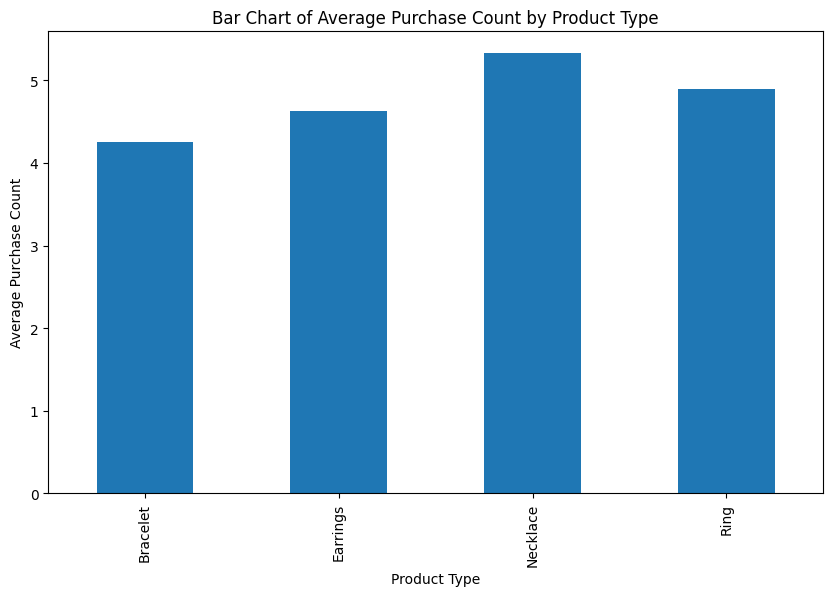

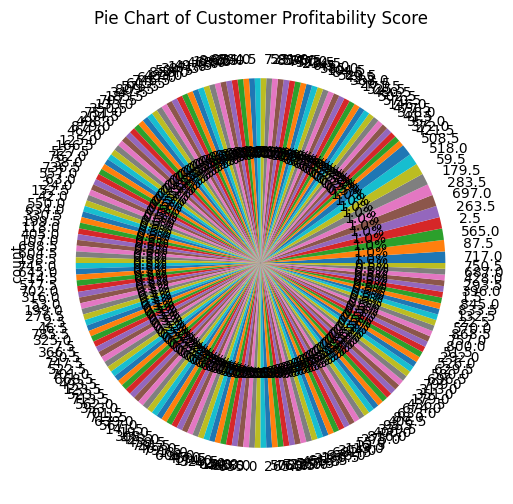

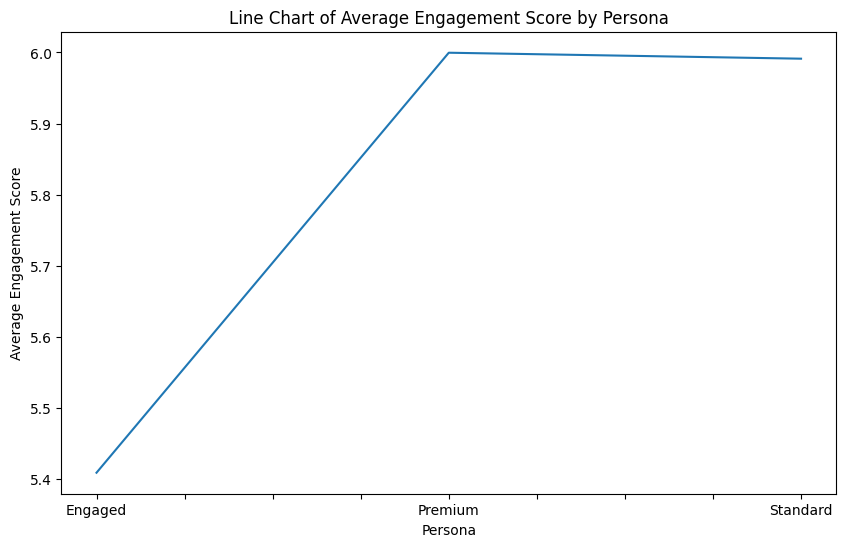

<Figure size 1000x600 with 0 Axes>

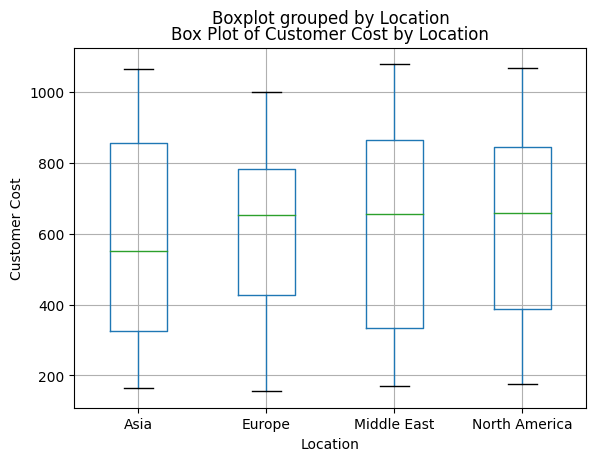

In [27]:
# Create a bar chart
plt.figure(figsize=(10, 6))
df.groupby("ProductType")["PurchaseCount"].mean().plot(kind="bar")
plt.xlabel("Product Type")
plt.ylabel("Average Purchase Count")
plt.title("Bar Chart of Average Purchase Count by Product Type")
plt.show()

# Create a pie chart
plt.figure(figsize=(10, 6))
df["CustomerProfitabilityScore"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Pie Chart of Customer Profitability Score")
plt.show()

# Create a line chart
plt.figure(figsize=(10, 6))
df.groupby("Persona")["EngagementScore"].mean().plot()
plt.xlabel("Persona")
plt.ylabel("Average Engagement Score")
plt.title("Line Chart of Average Engagement Score by Persona")
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot("CustomerCost", by="Location")
plt.xlabel("Location")
plt.ylabel("Customer Cost")
plt.title("Box Plot of Customer Cost by Location")
plt.show()

In [31]:
from sklearn.cluster import KMeans

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Age', 'PurchaseCount', 'TotalSpend', 'AveragePurchaseValue',
                       'EngagementScore', 'CustomerProfitabilityScore', 'NumberOfTransactions',
                       'CPA', 'RFMScore']
data_scaled = df.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Age,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,CustomerProfitabilityScore,NumberOfTransactions,CPA,RFMScore
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.598721e-16,-1.376677e-16,-4.884981e-17,9.325873e-17,-1.687539e-16,-4.884981e-17,-1.376677e-16,-7.771561e-17,1.487699e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.754084e+00,-1.472300e+00,-1.673272e+00,-8.530734e-01,-1.819084e+00,-1.673272e+00,-1.472300e+00,-1.716767e+00,-1.763285e+00
25%,-8.720805e-01,-6.933054e-01,-9.461253e-01,-5.863856e-01,-7.464262e-01,-9.461253e-01,-6.933054e-01,-9.263413e-01,-9.389648e-01
50%,8.342279e-02,-3.038080e-01,9.842228e-02,-3.414916e-01,1.969523e-02,9.842228e-02,-3.038080e-01,5.583961e-02,3.243018e-01
75%,8.368004e-01,8.646843e-01,8.445940e-01,2.998694e-02,7.696852e-01,8.445940e-01,8.646843e-01,8.964217e-01,1.022468e+00
max,1.626928e+00,1.643679e+00,1.756891e+00,4.242426e+00,1.751569e+00,1.756891e+00,1.643679e+00,1.802924e+00,1.305882e+00


In [34]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

In [35]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

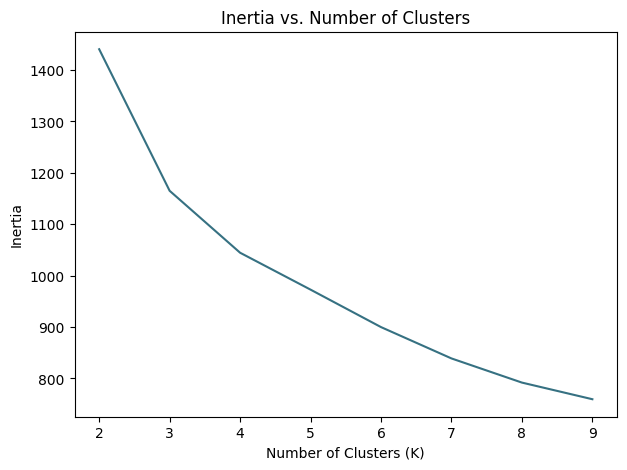

In [36]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

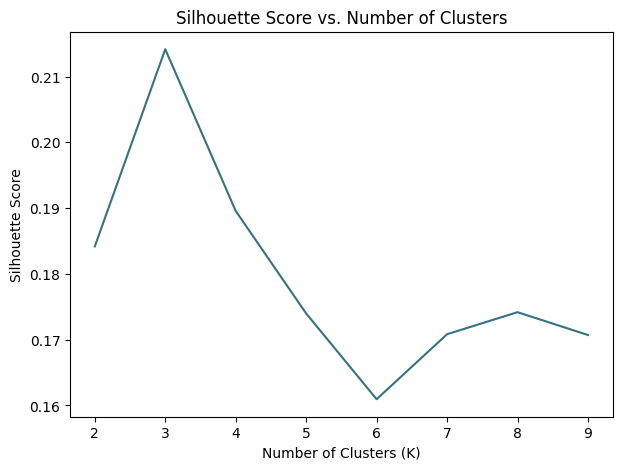

In [37]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [38]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


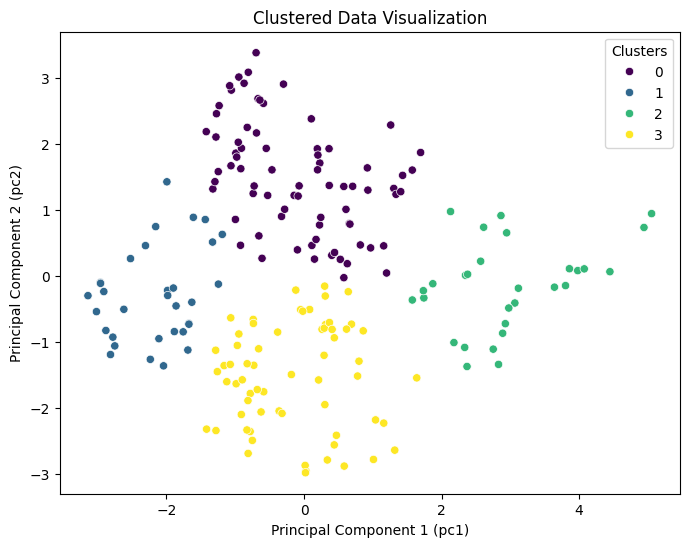

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [41]:
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[cols_for_clustering].mean()

,Age,PurchaseCount,TotalSpend,AveragePurchaseValue,EngagementScore,CustomerProfitabilityScore,NumberOfTransactions,CPA,RFMScore
Cluster,,,,,,,,,
0,44.106667,6.280000,1461.613333,254.152550,5.921418,630.806667,6.280000,103.289333,404.266667
1,39.875000,7.593750,457.968750,60.878596,5.150720,128.984375,7.593750,97.531181,345.593750
2,44.068966,1.413793,1441.655172,1136.982759,5.303579,620.827586,1.413793,99.893195,383.172414
3,39.234375,3.140625,565.796875,218.639844,5.489052,182.898438,3.140625,93.539125,323.843750


<ipython-input-51-71a8c3477552>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Size', data=cluster_sizes, palette='viridis')


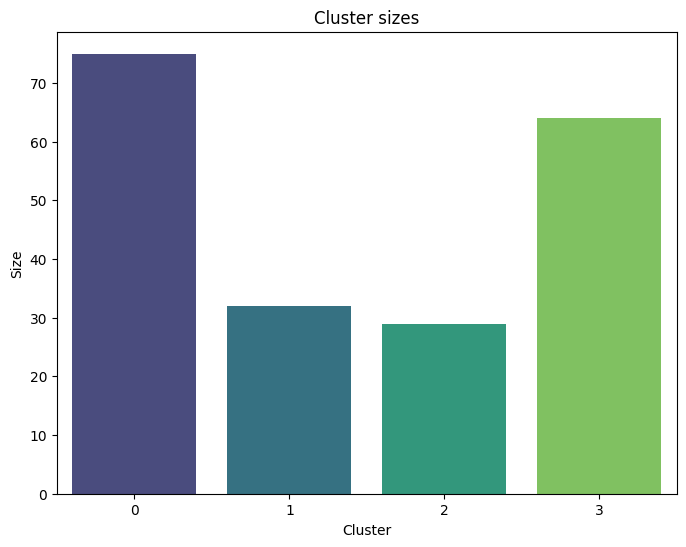

In [51]:
# Cluster sizes
cluster_sizes = df.groupby('Cluster').size().reset_index(name='Size')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Size', data=cluster_sizes, palette='viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.show()


<ipython-input-55-a91a89cde0e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TotalSpend', data=df, palette='viridis')


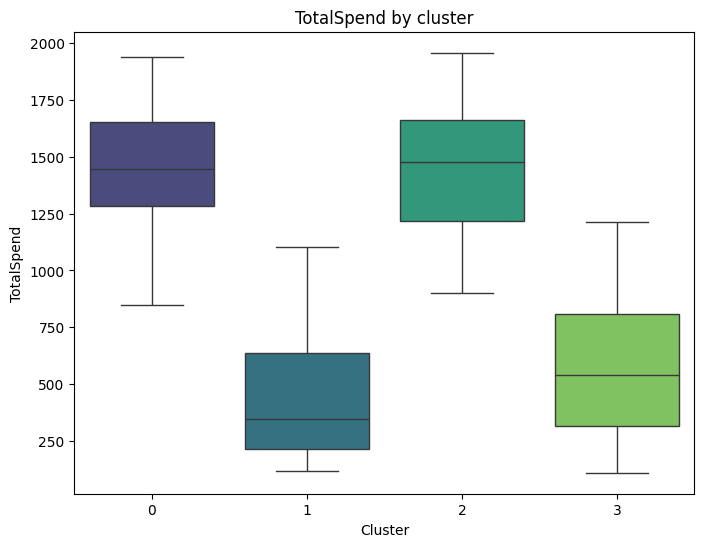

In [55]:
# Box plot of TotalSpend by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='TotalSpend', data=df, palette='viridis')
plt.title('TotalSpend by cluster')
plt.xlabel('Cluster')
plt.ylabel('TotalSpend')
plt.show()

<ipython-input-60-b33d4d952bee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='EngagementScore', data=df, palette='viridis')


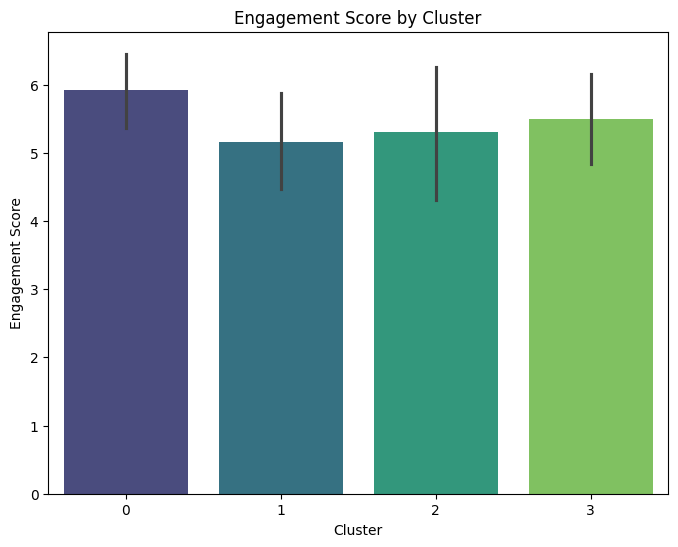

In [60]:
# Engagement score by cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='EngagementScore', data=df, palette='viridis')
plt.title('Engagement Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Engagement Score')
plt.show()

<ipython-input-75-e228d8e53ee7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Consumption", hue="Product", data=mnt_data_melted, ci=None, palette="viridis")


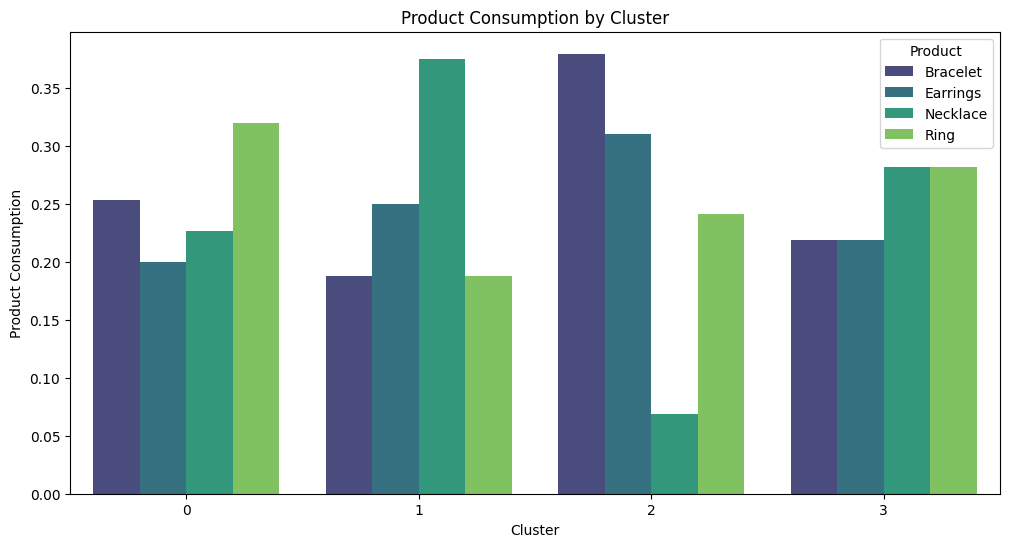

In [75]:
# Mean consumption of different product types by cluster
mnt_data = df.groupby('Cluster')['ProductType'].value_counts(normalize=True).unstack()

# Melt the DataFrame
mnt_data_melted = mnt_data.reset_index().melt(id_vars="Cluster", var_name="Product", value_name="Consumption")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=mnt_data_melted, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)
plt.legend(title="Product", loc="upper right")
plt.show()